## Week 1 & 2 Lab

***

## Project Description

The movie Moneyball focuses on the “quest for the secret of success in baseball”. It follows a low-budget team, the Oakland Athletics, who believed that underused statistics, such as a player’s ability to get on base, better predict the ability to score runs than typical statistics like home runs, RBIs (runs batted in), and batting average. Obtaining players who excelled in these underused statistics turned out to be much more affordable for the team.

In this lab we’ll be looking at data from all 30 Major League Baseball teams and examining the linear relationship between runs scored in a season and a number of other player statistics. Our aim will be to summarize these relationships both graphically and numerically in order to find which variable, if any, helps us best predict a team’s runs scored in a season.

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("mlb11.csv")

In [3]:
df

,team,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
0,Texas Rangers,855,5659,1599,210,0.283,930,143,96,0.340,0.460,0.800
1,Boston Red Sox,875,5710,1600,203,0.280,1108,102,90,0.349,0.461,0.810
2,Detroit Tigers,787,5563,1540,169,0.277,1143,49,95,0.340,0.434,0.773
3,Kansas City Royals,730,5672,1560,129,0.275,1006,153,71,0.329,0.415,0.744
4,St. Louis Cardinals,762,5532,1513,162,0.273,978,57,90,0.341,0.425,0.766
5,New York Mets,718,5600,1477,108,0.264,1085,130,77,0.335,0.391,0.725
6,New York Yankees,867,5518,1452,222,0.263,1138,147,97,0.343,0.444,0.788
7,Milwaukee Brewers,721,5447,1422,185,0.261,1083,94,96,0.325,0.425,0.750
8,Colorado Rockies,735,5544,1429,163,0.258,1201,118,73,0.329,0.410,0.739
9,Houston Astros,615,5598,1442,95,0.258,1164,118,56,0.311,0.374,0.684


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team          30 non-null     object 
 1   runs          30 non-null     int64  
 2   at_bats       30 non-null     int64  
 3   hits          30 non-null     int64  
 4   homeruns      30 non-null     int64  
 5   bat_avg       30 non-null     float64
 6   strikeouts    30 non-null     int64  
 7   stolen_bases  30 non-null     int64  
 8   wins          30 non-null     int64  
 9   new_onbase    30 non-null     float64
 10  new_slug      30 non-null     float64
 11  new_obs       30 non-null     float64
dtypes: float64(4), int64(7), object(1)
memory usage: 2.9+ KB


In [5]:
df.describe()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000
mean,693.600000,5523.500000,1408.900000,151.733333,0.254933,1149.600000,109.300000,80.966667,0.320467,0.398833,0.71910
std,82.479088,79.873067,87.081947,35.587612,0.012744,108.049988,29.868851,11.415305,0.013441,0.029131,0.04155
min,556.000000,5417.000000,1263.000000,91.000000,0.233000,930.000000,49.000000,56.000000,0.292000,0.348000,0.64000
25%,629.000000,5448.250000,1348.000000,118.000000,0.244750,1085.250000,89.750000,72.000000,0.311000,0.377000,0.69200
50%,705.500000,5515.500000,1394.500000,154.000000,0.253000,1140.500000,107.000000,80.000000,0.318500,0.398500,0.71600
75%,734.000000,5575.000000,1441.000000,172.750000,0.260250,1247.750000,130.750000,90.000000,0.328250,0.413000,0.73825
max,875.000000,5710.000000,1600.000000,222.000000,0.283000,1323.000000,170.000000,102.000000,0.349000,0.461000,0.81000


In [6]:
df.columns

Index(['team', 'runs', 'at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts', 'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs'], dtype='object')

What type of plot would you use to display the relationship between runs and one of the other numerical variables?

scatterplot 

Plot the relationship between runs and at_bats, using at_bats as the explanatory variable.
The relationship appears to be … 

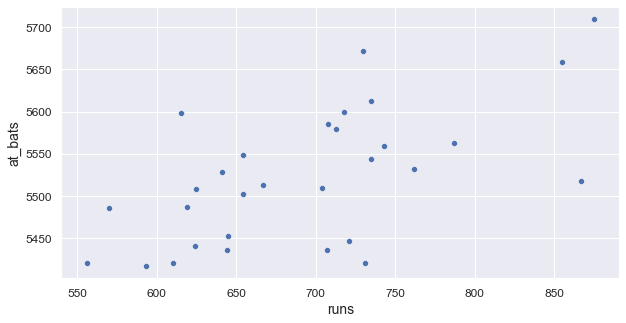

In [7]:
plt.figure(figsize=(10,5))
plt.title("")
sns.scatterplot(x=df.runs, y=df.at_bats, data=df)
plt.show()

linear

Looking at your plot from the previous exercise, which of the following best describe the relationship between these two variables? 

The relationship is positive, linear, and very weak. One of the potential outliers is a team with approximately 5520 at bats. 

## Regression Analysis

Fit a new model that uses homeruns to predict runs. Using the estimates from the R output, write the equation of the regression line. What does the slope tell us in the context of the relationship between success of a team and its home runs? 

In [8]:
df.columns

Index(['team', 'runs', 'at_bats', 'hits', 'homeruns', 'bat_avg', 'strikeouts', 'stolen_bases', 'wins', 'new_onbase', 'new_slug', 'new_obs'], dtype='object')

In [9]:
y = df['runs']
X = df['homeruns']

In [10]:
X = sm.add_constant(X)

In [11]:
model = sm.OLS(y,X).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   runs   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     46.98
Date:                Tue, 30 Mar 2021   Prob (F-statistic):           1.90e-07
Time:                        11:51:22   Log-Likelihood:                -159.66
No. Observations:                  30   AIC:                             323.3
Df Residuals:                      28   BIC:                             326.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        415.2389     41.678      9.963      0.000     329.866     500.612
homeruns       1.8345      0.268      6.854      0.000       1.286       2.383
==============================================================================
Omnibus:                        0.700   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.736
Skew:                           0.165   Prob(JB):                        0.692
Kurtosis:                       2.307   Cond. No.                         693.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For each additional home run, the model predicts 1.83 more runs, on average.

What is the residual for the prediction of runs for a team with 5,579 at-bats? Choose the closest answer.

15.32

In [13]:
model.resid

0      54.507375
1      87.349166
2      61.723581
3      78.105246
4      49.565373
5     104.630620
6      44.492876
7     -33.629085
8      20.730831
9      25.479661
10    -57.636334
11     14.119746
12    -32.751045
13    -15.960001
14    -32.592836
15     17.076247
16    -43.758294
17      6.241706
18      0.219957
19    -13.463626
20     14.803328
21    -63.585586
22     -1.534838
23     20.623370
24    -23.780043
25    -91.614585
26    -73.758294
27    -67.218421
28     10.817828
29    -59.203921
dtype: float64

Which of the following statements about the residual plot is false? 

The plot is indicative of a linear relationship between runs and at-bats.

Which of the following is true? 

The residuals are fairly symmetric, with only a slightly longer tail on the right, hence it would be appropriate to deem the the normal distribution of residuals condition met.

Based on the residuals plot from earlier, the constant variability condition appears to be met.

True

Now that you can summarize the linear relationship between two variables, investigate the relationships between runs and each of the other five traditional variables. Which variable best predicts runs? Support your conclusion using the graphical and numerical methods we’ve discussed. 

### Pairplots

<Figure size 1440x1440 with 0 Axes>

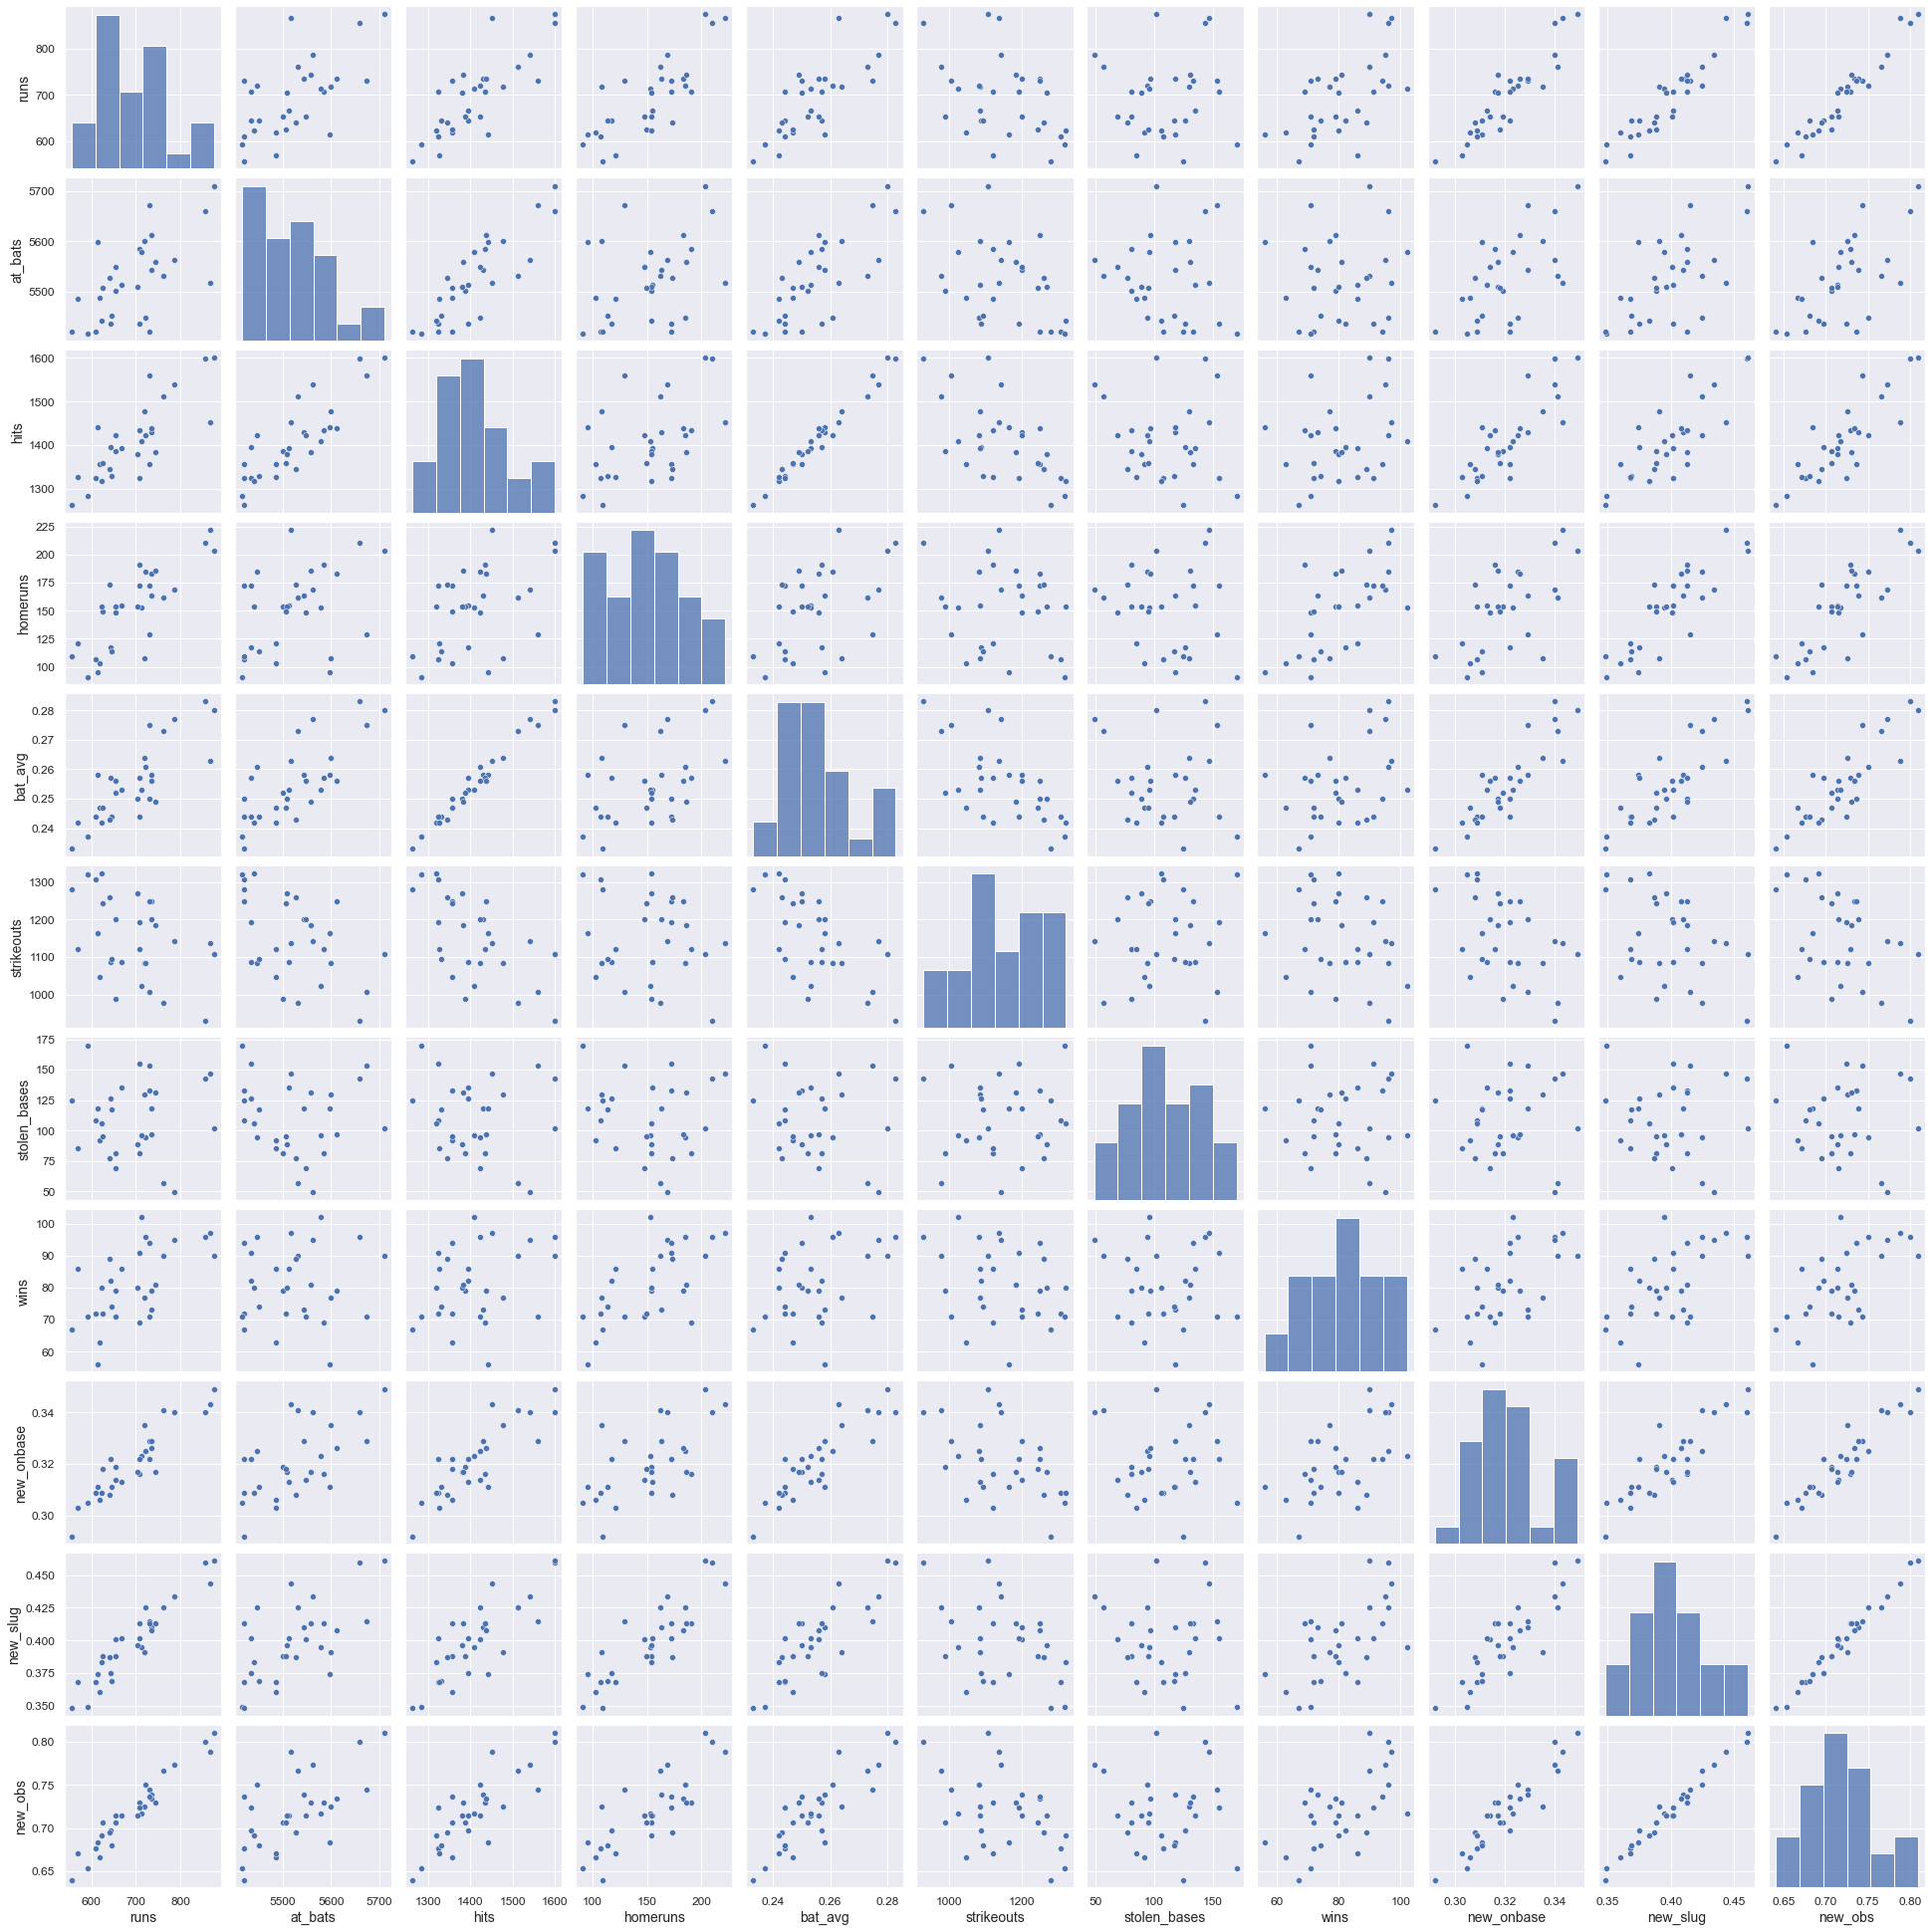

In [14]:
plt.figure(figsize=(20,20))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)
sns.pairplot(df)
plt.show()

### Correlation

In [15]:
df.corr()

,runs,at_bats,hits,homeruns,bat_avg,strikeouts,stolen_bases,wins,new_onbase,new_slug,new_obs
runs,1.000000,0.610627,0.801211,0.791558,0.809986,-0.411531,0.053981,0.600809,0.921469,0.947032,0.966916
at_bats,0.610627,1.000000,0.846472,0.376515,0.755374,-0.463424,-0.107529,0.062156,0.598145,0.620277,0.627909
hits,0.801211,0.846472,1.000000,0.470838,0.987958,-0.617228,-0.126330,0.297659,0.854846,0.818238,0.850833
homeruns,0.791558,0.376515,0.470838,1.000000,0.471511,-0.170755,-0.117324,0.660614,0.616327,0.862832,0.810667
bat_avg,0.809986,0.755374,0.987958,0.471511,1.000000,-0.634814,-0.123147,0.350793,0.882302,0.828490,0.867099
strikeouts,-0.411531,-0.463424,-0.617228,-0.170755,-0.634814,1.000000,0.087642,-0.280727,-0.486880,-0.409822,-0.443975
stolen_bases,0.053981,-0.107529,-0.126330,-0.117324,-0.123147,0.087642,1.000000,-0.064594,-0.033256,-0.074128,-0.061846
wins,0.600809,0.062156,0.297659,0.660614,0.350793,-0.280727,-0.064594,1.000000,0.552278,0.614166,0.612075
new_onbase,0.921469,0.598145,0.854846,0.616327,0.882302,-0.486880,-0.033256,0.552278,1.000000,0.871865,0.937283
new_slug,0.947032,0.620277,0.818238,0.862832,0.828490,-0.409822,-0.074128,0.614166,0.871865,1.000000,0.987764


In [16]:
df.corr()["runs"].sort_values()

strikeouts     -0.411531
stolen_bases    0.053981
wins            0.600809
at_bats         0.610627
homeruns        0.791558
hits            0.801211
bat_avg         0.809986
new_onbase      0.921469
new_slug        0.947032
new_obs         0.966916
runs            1.000000
Name: runs, dtype: float64

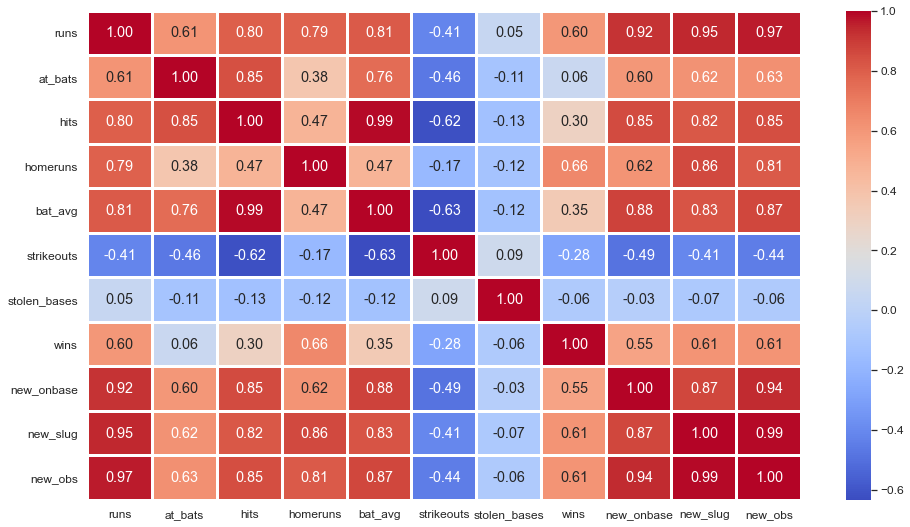

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()

batting average 

Now examine the three newer variables. These are the statistics used by the author of Moneyball to predict a teams success. In general, are they more or less effective at predicting runs that the old variables? Explain using appropriate graphical and numerical evidence. Of all ten variables we’ve analyzed, which seems to be the best predictor of runs? 

on-base plus slugging (new_obs)

#### Python code done by Dennis Lam